In [4]:
# Task 2(Level 2)Decision tree for Classification 

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
data = pd.read_csv("iris.csv")

In [7]:
data.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [8]:
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [9]:
# to divide the dependent and independent value
x = data.iloc[:,:-1]
x

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [10]:
data.shape

(150, 5)

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
sc = StandardScaler()
sc.fit(x)


StandardScaler()

In [13]:
from sklearn.datasets import load_iris
iris = load_iris()
x = iris.data                          # Features (sepal length, petal length, etc.)
y = iris.target                        # Labels (0: setosa, 1: versicolor, 2: virginica)

from sklearn.model_selection import train_test_split
    

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=42)

In [15]:
from sklearn.tree import DecisionTreeClassifier

In [16]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [17]:
dt.score(x_test, y_test)*100

96.66666666666667

In [18]:
from sklearn.tree import plot_tree

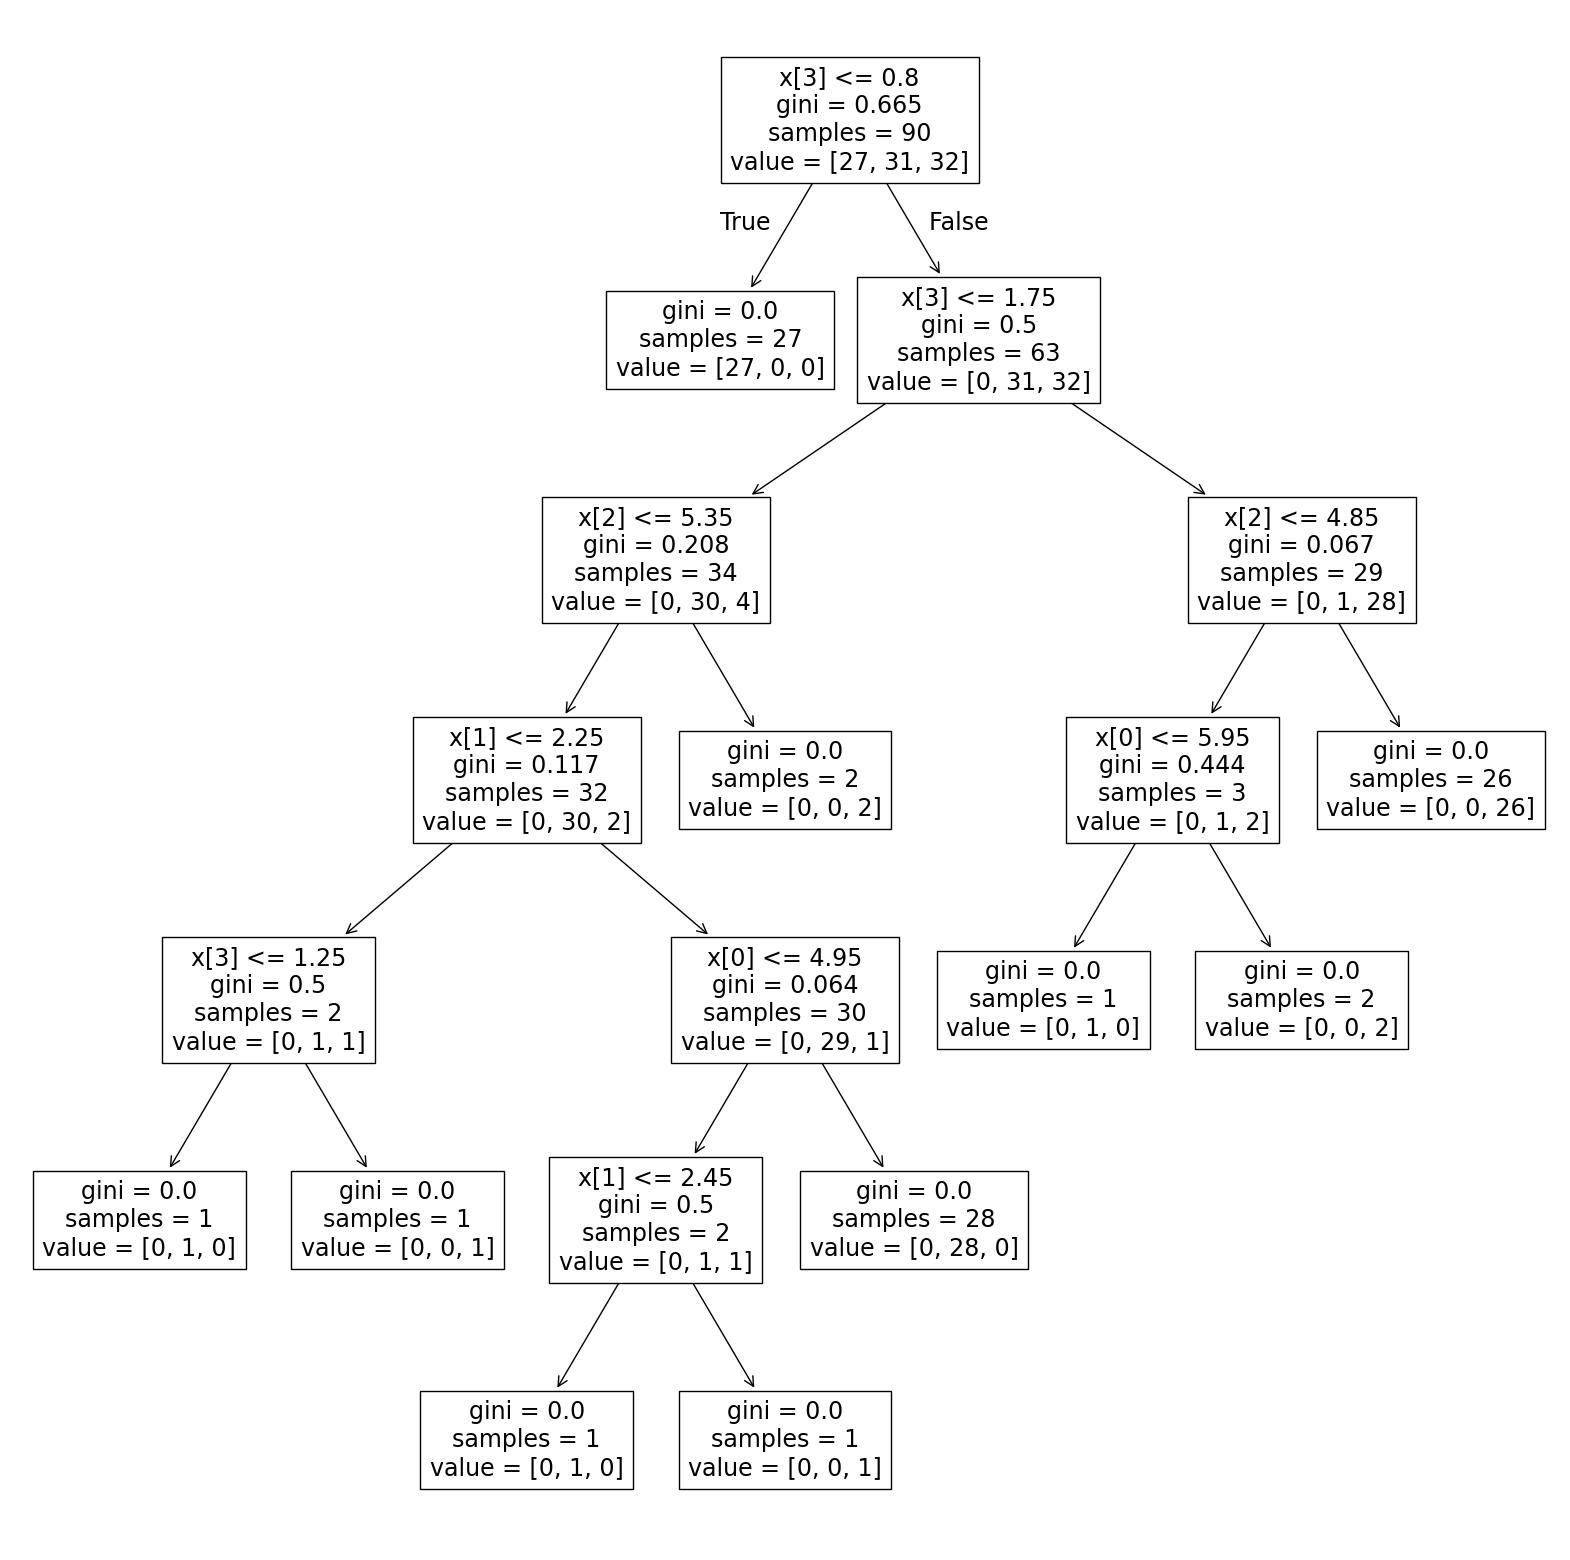

In [19]:
plt.figure(figsize=(20,20))
plot_tree(dt)
plt.savefig("demo.jpg")
plt.show()

In [20]:
from sklearn.tree import DecisionTreeClassifier


In [21]:
pruned_dt = DecisionTreeClassifier(max_depth=3, random_state=42)
pruned_dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

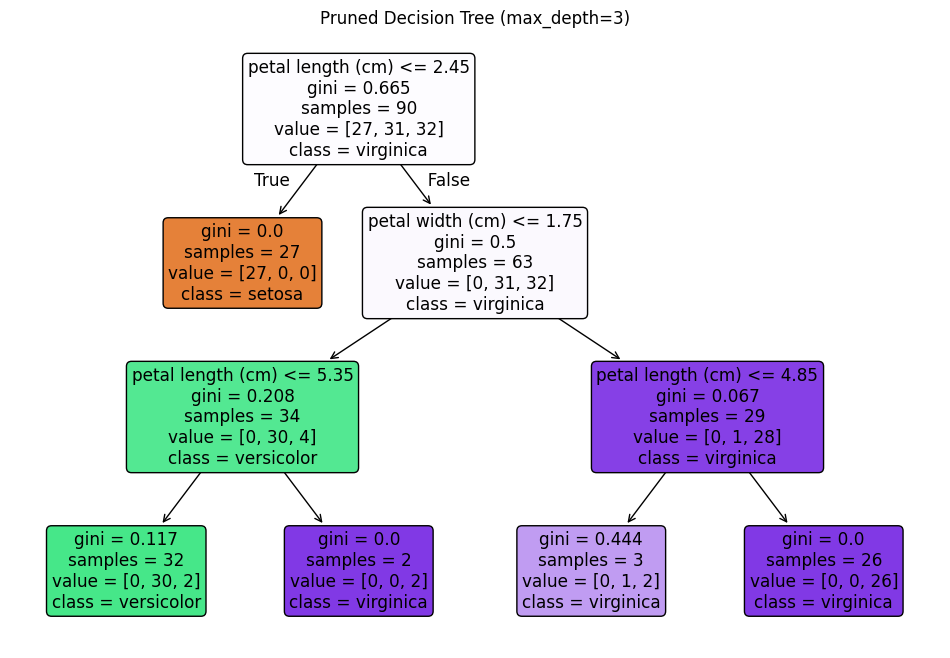

In [22]:
plt.figure(figsize=(12, 8))
plot_tree(pruned_dt, 
          filled=True,
          rounded=True,
          feature_names=iris.feature_names,
          class_names=iris.target_names)
plt.title("Pruned Decision Tree (max_depth=3)")
plt.show()

In [23]:
from sklearn.metrics import accuracy_score, f1_score, classification_report

In [24]:
y_pred = pruned_dt.predict(x_test)


In [25]:
acc = accuracy_score(y_test, y_pred)
print("Pruned Tree Accuracy: {:.2f}%".format(acc * 100))

Pruned Tree Accuracy: 98.33%


In [26]:
f1 = f1_score(y_test, y_pred, average='macro')  # 'macro' is good for multi-class
print("Pruned Tree F1 Score: {:.2f}".format(f1))

Pruned Tree F1 Score: 0.98


In [27]:
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=iris.target_names))



Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        23
  versicolor       0.95      1.00      0.97        19
   virginica       1.00      0.94      0.97        18

    accuracy                           0.98        60
   macro avg       0.98      0.98      0.98        60
weighted avg       0.98      0.98      0.98        60

